# Class Workbook {.tabset .tabset-fade .tabset-pills}

## In class activity

In [3]:
import numpy as np
import pandas as pd
import math
from matplotlib.pyplot import subplots
#import statsmodels.api as sm
from plotnine import *
import plotly.express as px
import statsmodels.formula.api as sm
#import ISLP as islp

### Ames Housing data

Let's revisit Ames Hoursing data.

In [4]:
ames_raw=pd.read_csv("ames_raw.csv")

### Questions

Use data of `ames_raw` up to 2008 to predict the housing price for the later years.

In [5]:
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

Use the same loss function calculator.

In [6]:
def calc_loss(prediction,actual):
  difpred = actual-prediction
  RMSE =pow(difpred.pow(2).mean(),1/2)
  operation_loss=abs(sum(difpred[difpred<0]))+sum(0.1*actual[difpred>0])
  return RMSE,operation_loss

Use nonlinear methods discussed in ch 7 of the book.  Can you make a better prediction?

Your code:

In [7]:
from sklearn.model_selection import train_test_split

X = ames_raw_2008[['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold']]
y = ames_raw_2008['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

#polynomial
degree =2 
poly_reg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
poly_reg.fit(X_train,y_train)
y_pred = poly_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
y_predt = poly_reg.predict(X_train)
mset = mean_squared_error(y_train, y_predt)
r2t = r2_score(y_train, y_train)

print(f"Test Mean Squared Error (MSE): {mse}")
print(f"Test R^2 Score: {r2}")
print(f"Train Mean Squared Error (MSE): {mset}")
print(f"Train R^2 Score: {r2t}")

Test Mean Squared Error (MSE): 7595414113.745113
Test R^2 Score: -0.19490068634909674
Train Mean Squared Error (MSE): 414988208.9414007
Train R^2 Score: 1.0


In [9]:
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Spline
transformed_x_train = dmatrix("bs(train, df=3, include_intercept=False)",
                               {"train": X_train['Lot Area']},
                               return_type='dataframe')

transformed_x_test = dmatrix("bs(train, df=3, include_intercept=False)",
                              {"train": X_test['Lot Area']},
                              return_type='dataframe')


spline_reg = sm.GLM(y_train, transformed_x_train).fit()

y_train_pred = spline_reg.predict(transformed_x_train)
y_test_pred = spline_reg.predict(transformed_x_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error (MSE): {test_mse}")
print(f"Test R^2 Score: {test_r2}")
print(f"Train Mean Squared Error (MSE): {train_mse}")
print(f"Train R^2 Score: {train_r2}")



Test Mean Squared Error (MSE): 16087489912.098925
Test R^2 Score: -1.5308630246788222
Train Mean Squared Error (MSE): 5744749341.027792
Train R^2 Score: 0.1704892631640853


In [10]:
from pygam import LinearGAM, s
from sklearn.metrics import mean_squared_error, r2_score


# 's()' is used to indicate a spline for each feature.
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) +
                s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) +
                s(17) + s(18) + s(19) + s(20) + s(21) + s(22))

gam.fit(X_train, y_train)

# Make predictions
y_train_pred = gam.predict(X_train)
y_test_pred = gam.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Train R^2: {train_r2}, Test R^2: {test_r2}")
    

Train RMSE: 21351.43966086876, Test RMSE: 26940.91111587323
Train R^2: 0.9341728193771607, Test R^2: 0.885816089741897


In [31]:
# print(gam.summary())

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    156.2676
Link Function:                     IdentityLink Log Likelihood:                                -22196.8119
Number of Samples:                         1055 AIC:                                            44708.1591
                                                AICc:                                           44763.6726
                                                GCV:                                        742236726.2833
                                                Scale:                                      547401792.2959
                                                Pseudo R-Squared:                                   0.9328
Feature Function                  Lam

/var/folders/f0/mtnwyzls70d4t3xz748bw4kh0000gn/T/ipykernel_50356/3564666153.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



Your answer:

~~~
Please write your answer in full sentences.


~~~

### COVID Data

Let's revisit COVID data.
I've divided the data into training and testing data.

In [11]:
import zipfile
Train_COVID= pd.read_csv('Train_COVID.zip',compression='zip')
Test_COVID= pd.read_csv('Test_COVID.zip',compression='zip')
Train_COVID= Train_COVID.dropna()
Test_COVID= Test_COVID.dropna()
# list(Train_COVID.columns)

Try the method described in Ch7.  See if you can improve the performance.

Your code:

In [12]:
X = Train_COVID[['USMER','MEDICAL_UNIT','SEX','PATIENT_TYPE','INTUBED',
 'PNEUMONIA','AGE','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION',
 'OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO','CLASIFFICATION_FINAL',
 'ICU','AGE_TRUNK']]
y = Train_COVID['SURVIVED']

In [13]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_train_pred_poly = model_poly.predict(X_train_poly)
y_test_pred_poly = model_poly.predict(X_test_poly)

poly_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
poly_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))
poly_train_r2 = r2_score(y_train, y_train_pred_poly)
poly_test_r2 = r2_score(y_test, y_test_pred_poly)

print(f"Test Mean Squared Error (MSE): {poly_test_rmse }")
print(f"Test R^2 Score: {poly_test_r2}")
print(f"Train Mean Squared Error (MSE): {poly_train_rmse}")
print(f"Train R^2 Score: {poly_train_r2}")

Test Mean Squared Error (MSE): 0.40498226248498775
Test R^2 Score: 0.280033964501187
Train Mean Squared Error (MSE): 0.4008958145020614
Train R^2 Score: 0.2982952175871514


In [14]:
# spline
transformed_x_train_spline = dmatrix("bs(train, df=4, include_intercept=False)",
                                     {"train": X_train['AGE']},
                                     return_type='dataframe')
transformed_x_test_spline = dmatrix("bs(train, df=4, include_intercept=False)",
                                    {"train": X_test['AGE']},
                                    return_type='dataframe')

model_spline = sm.GLM(y_train, transformed_x_train_spline).fit()

y_train_pred_spline = model_spline.predict(transformed_x_train_spline)
y_test_pred_spline = model_spline.predict(transformed_x_test_spline)

spline_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_spline))
spline_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_spline))
spline_train_r2 = r2_score(y_train, y_train_pred_spline)
spline_test_r2 = r2_score(y_test, y_test_pred_spline)

print(f"Test Mean Squared Error (MSE): {spline_test_rmse }")
print(f"Test R^2 Score: {spline_test_r2}")
print(f"Train Mean Squared Error (MSE): {spline_train_rmse}")
print(f"Train R^2 Score: {spline_train_r2}")

Test Mean Squared Error (MSE): 0.45236445215420346
Test R^2 Score: 0.10170921638055574
Train Mean Squared Error (MSE): 0.4537385344862103
Train R^2 Score: 0.1011179245502064


In [30]:
# gam
gam = LinearGAM(s(0) + s(1) + s(2) + s(4) + s(5) +s(6) + s(7) + s(8) + s(9) + 
                s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16))

gam.fit(X_train, y_train)
# Make predictions
y_train_pred = gam.predict(X_train)
y_test_pred = gam.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Train R^2: {train_r2}, Test R^2: {test_r2}")

Train RMSE: 1429.4044557585705, Test RMSE: 2919.861528809388
Train R^2: 0.877009958761165, Test R^2: 0.40621487738084683


Your answer:

~~~
Please write your answer in full sentences.


~~~

## Problem Set

### College Data

This question relates to the College data set.

In [18]:
from ISLP import load_data
College = load_data("College")
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(a) Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors.  Based on the exercises in the previous chapter, identify a satisfactory model that uses just a subset of the predictors.



Your code:

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Convert 'Private' to numerical type
label_encoder = LabelEncoder()
College['Private'] = label_encoder.fit_transform(College['Private'])

X = College.drop('Outstate', axis=1)
y = College['Outstate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55) 

In [24]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_model.predict(X_test)

# MSE
test_error = mean_squared_error(y_test, y_pred)
print(f"The test error (MSE) is: {test_error}")

The test error (MSE) is: 3740999.9616545294


In [27]:
print('coefficients:',linear_model.coef_)
print('intercept:',linear_model.intercept_)

coefficients: [ 2.07941977e+03 -1.82960647e-01  8.55648272e-01 -1.03688075e+00
  2.72104304e+01 -9.49283330e+00 -9.87944147e-02 -8.59415998e-04
  8.89966874e-01 -8.74031467e-02 -2.02441581e-01  1.43691962e+01
  2.61834137e+01 -6.49589380e+01  4.60155386e+01  1.79197534e-01
  2.41502601e+01]
intercept: -1412.784301714546


In [31]:
# forward selection
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def forward_selection(X_train, y_train, X_test, y_test):
    remaining_features = list(X_train.columns)
    selected_features = []
    current_score, best_new_score = float('inf'), float('inf')
    
    # Iterate as long as there are features remaining and the model continues to improve
    while remaining_features and current_score >= best_new_score:
        scores_with_candidates = []
        
        # Iterate through all remaining features
        for candidate in remaining_features:
            # Use current selected features and the candidate for this iteration
            X_train_with_candidate = X_train[selected_features + [candidate]]
            X_test_with_candidate = X_test[selected_features + [candidate]]
            
            # Fit the model and calculate MSE
            model = LinearRegression().fit(X_train_with_candidate, y_train)
            y_pred = model.predict(X_test_with_candidate)
            mse = mean_squared_error(y_test, y_pred)
            
            # Store the result
            scores_with_candidates.append((mse, candidate))
        
        # Find the best candidate by minimum MSE
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        
        # Update the selected features and current score if there's improvement
        if current_score > best_new_score:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            current_score = best_new_score
            print(f"Selected {best_candidate} with MSE {best_new_score}")
        else:
            break
    
    return selected_features

# Apply the forward selection function
selected_features = forward_selection(X_train, y_train, X_test, y_test)
print("Final selected features:", selected_features)


Selected Expend with MSE 7658629.139013601
Selected Private with MSE 4795379.700581217
Selected Terminal with MSE 4055857.8582738056
Selected Grad.Rate with MSE 3661359.617504466
Selected Room.Board with MSE 3552748.38877892
Selected perc.alumni with MSE 3385989.1009308114
Selected Personal with MSE 3326509.787152336
Selected Top10perc with MSE 3278222.7287850915
Selected Books with MSE 3256003.3929508887
Final selected features: ['Expend', 'Private', 'Terminal', 'Grad.Rate', 'Room.Board', 'perc.alumni', 'Personal', 'Top10perc', 'Books']


In [33]:
X_train_forward = X_train[['Expend', 'Private', 'Terminal', 'Grad.Rate', 'Room.Board', 'perc.alumni', 'Personal', 'Top10perc', 'Books']]
X_test_forward = X_test[['Expend', 'Private', 'Terminal', 'Grad.Rate', 'Room.Board', 'perc.alumni', 'Personal', 'Top10perc', 'Books']]
linear_model_forward = LinearRegression()
linear_model_forward.fit(X_train_forward, y_train)

LinearRegression()

In [35]:
y_pred = linear_model_forward.predict(X_test_forward)
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error (MSE): {mse}")
print('coefficients:',linear_model_forward.coef_)
print('intercept:',linear_model_forward.intercept_)

Test Mean Squared Error (MSE): 3256003.3929508887
coefficients: [ 2.07060169e-01  2.58609006e+03  3.99224172e+01  2.84823225e+01
  9.88937755e-01  4.25599215e+01 -2.74692250e-01  9.99576393e+00
 -4.72392869e-01]
intercept: -3411.5826389653666


Your answer:

~~~
Please write your answer in full sentences.


~~~


(b) Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.



Your code:

In [39]:
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8))
gam.fit(X_train_forward, y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + intercept,
   tol=0.0001, verbose=False)

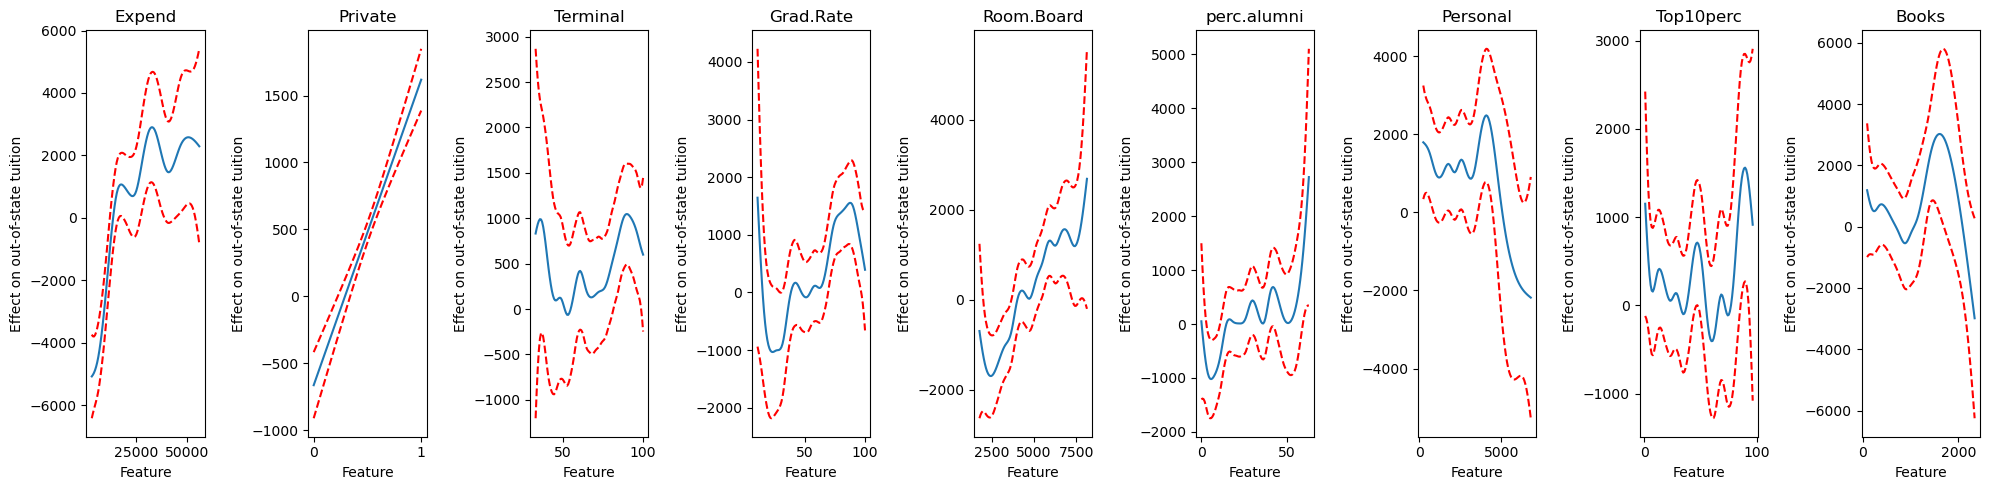

In [41]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 9, figsize=(20, 5))

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(selected_features[i])
    ax.set_xlabel('Feature')
    ax.set_ylabel('Effect on out-of-state tuition')

plt.tight_layout()
plt.show()

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Evaluate the model obtained on the test set, and explain the results.



Your code:

In [43]:
from sklearn.metrics import mean_absolute_error
y_pred = gam.predict(X_test_forward)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 1395.1957078649557
Mean Squared Error (MSE): 3490734.141763259
R-squared (R²): 0.7568795036106504


Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) For which variables, if any, is there evidence of a non-linear relationship with the response?



Your code:

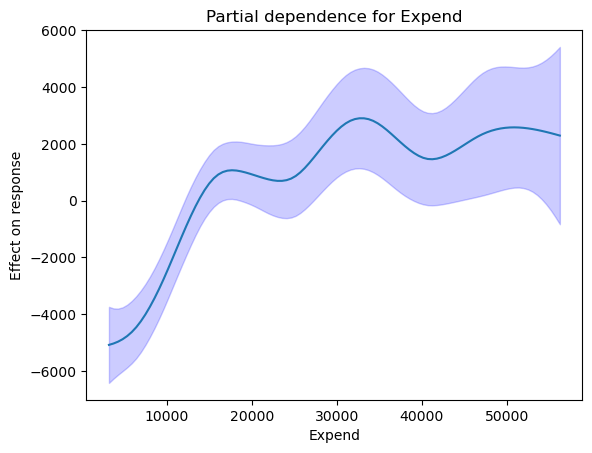

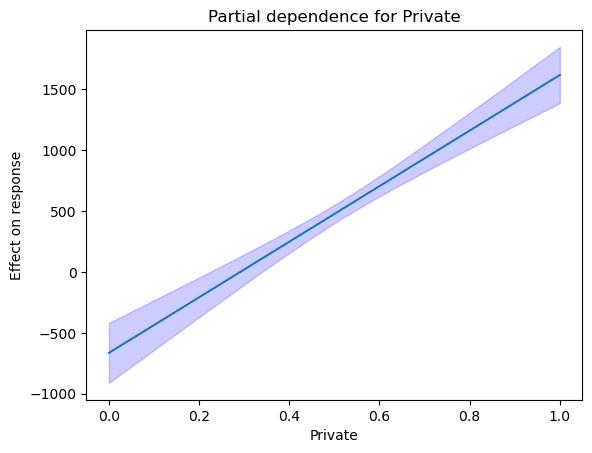

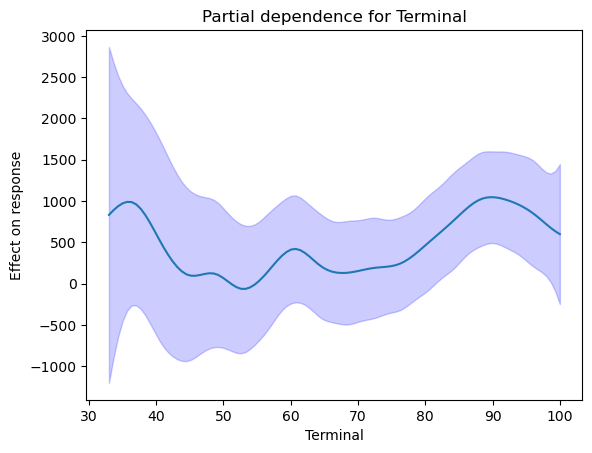

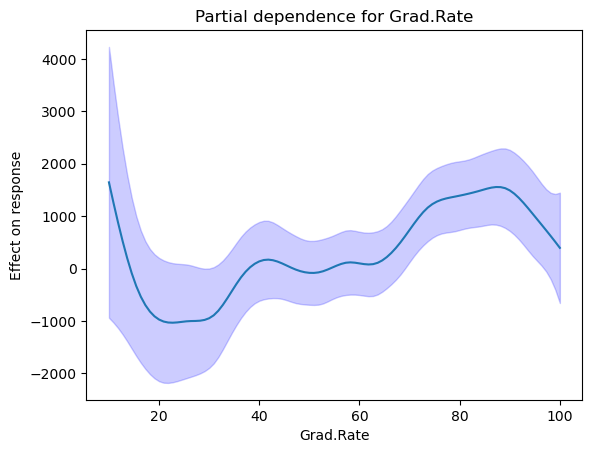

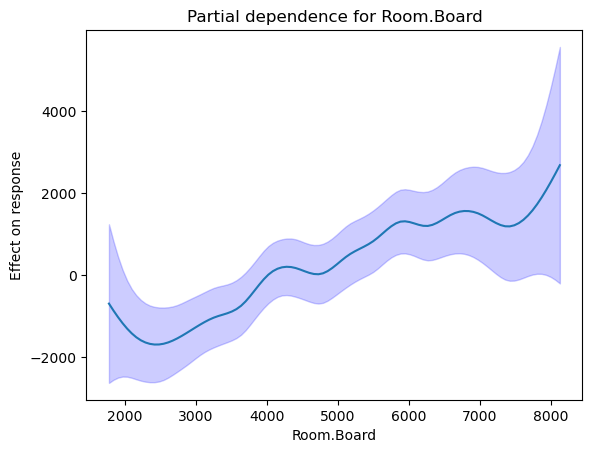

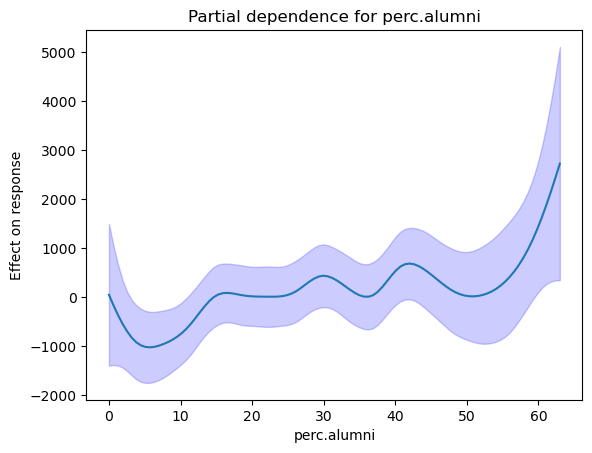

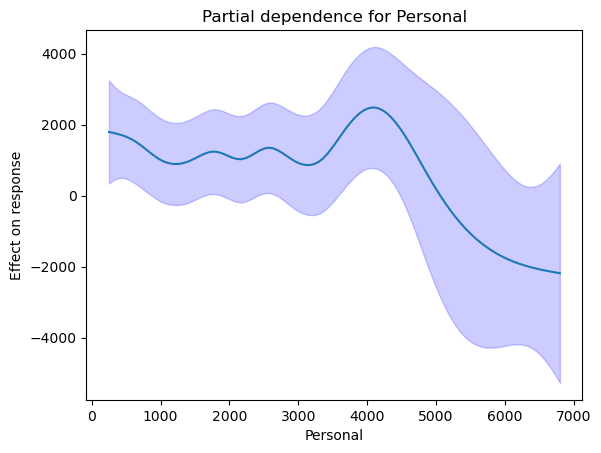

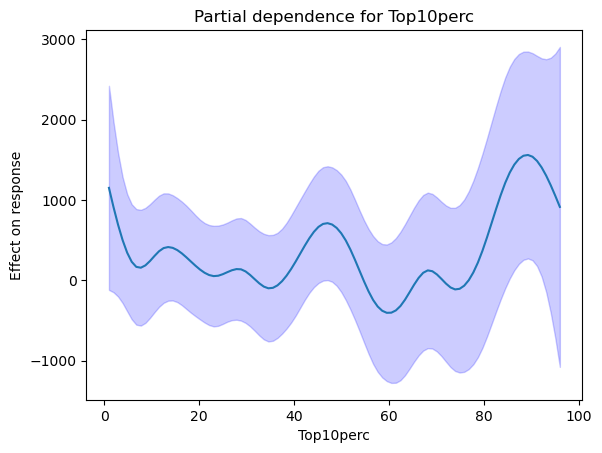

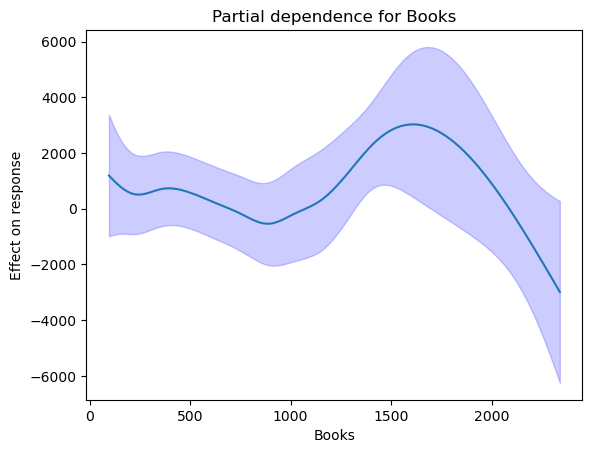

In [44]:
for i, feature in enumerate(selected_features):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    
    plt.figure()
    plt.plot(XX[:, i], pdep)
    plt.fill_between(XX[:, i], confi[:, 0], confi[:, 1], color='b', alpha=0.2)
    plt.title(f'Partial dependence for {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Effect on response')
    plt.show()

Your answer:

~~~
Please write your answer in full sentences.


~~~

### Auto Data

Fit some of the non-linear models investigated in chapter 7 to the `Auto` data set. Is there evidence for non-linear relationships in this data set? Create some informative plots to justify your answer.


Your code:

In [46]:
auto = load_data("Auto")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


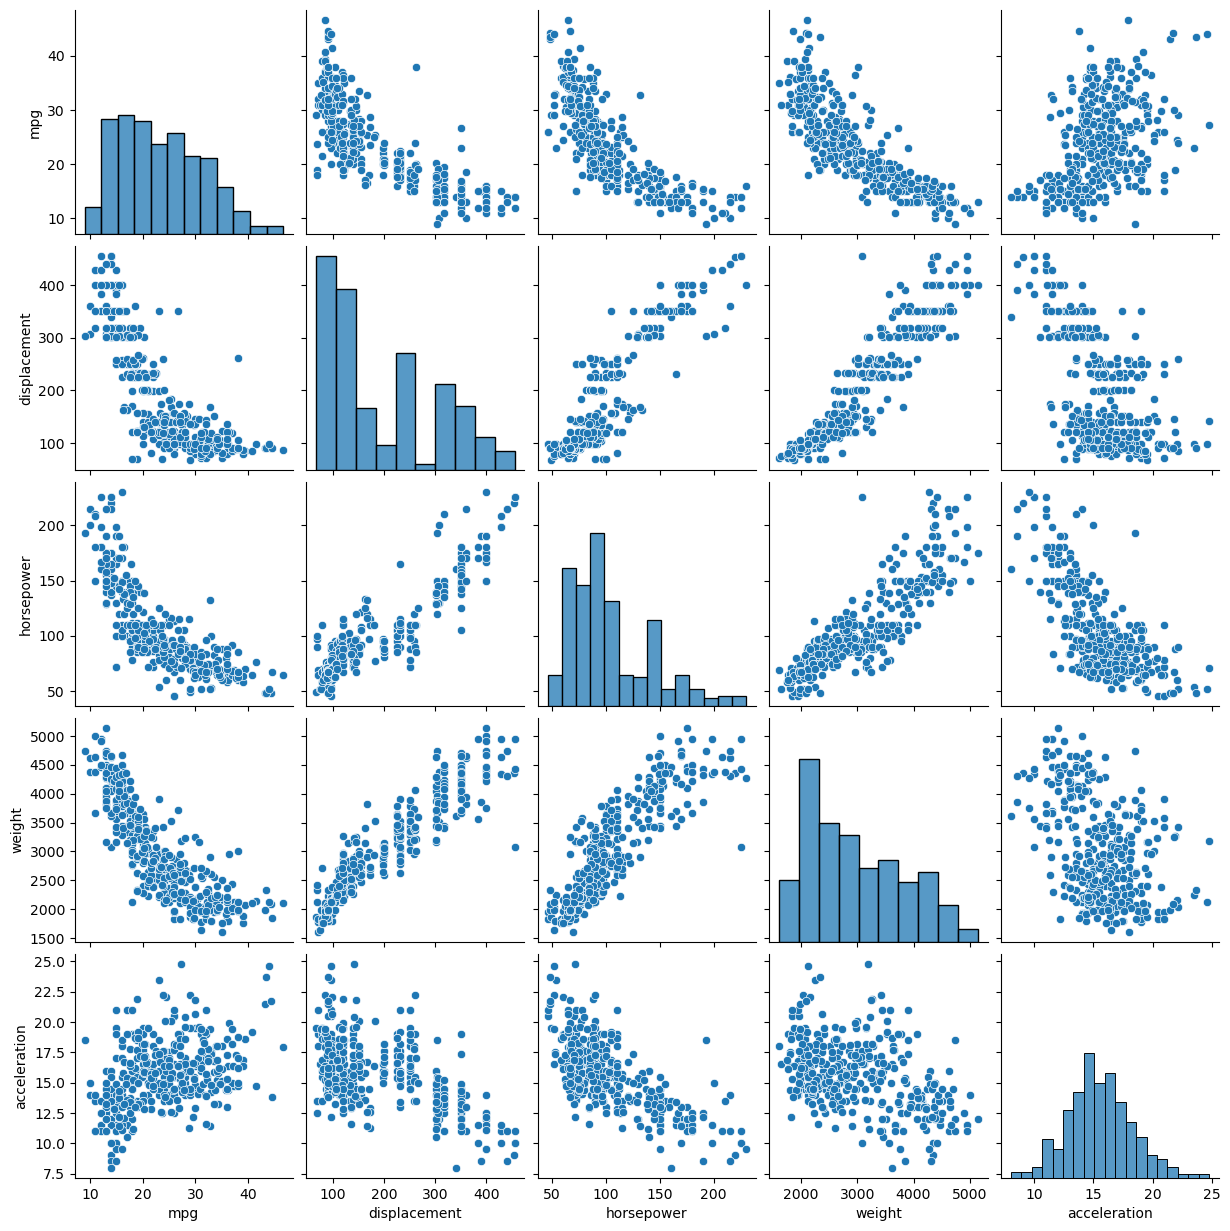

In [47]:
import seaborn as sns

sns.pairplot(auto[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']])
plt.show()

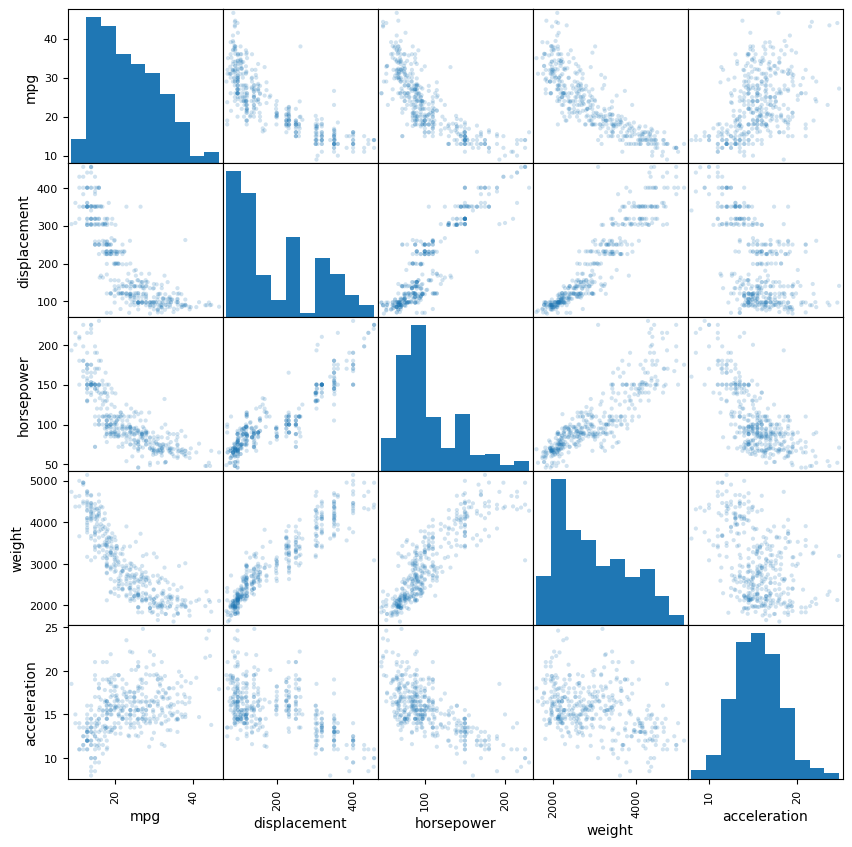

In [48]:
from pandas.plotting import scatter_matrix

scatter_matrix(auto[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']], alpha=0.2, figsize=(10, 10))
plt.show()

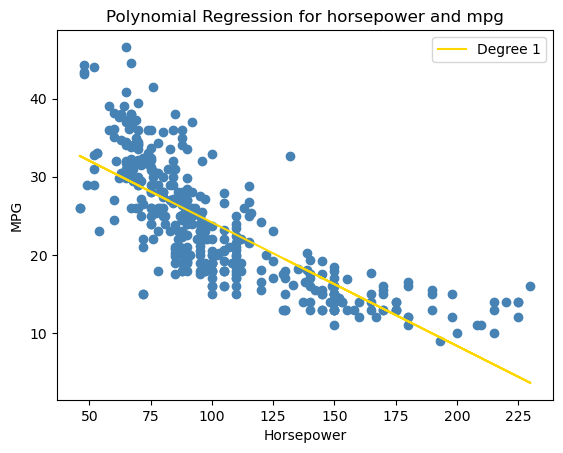

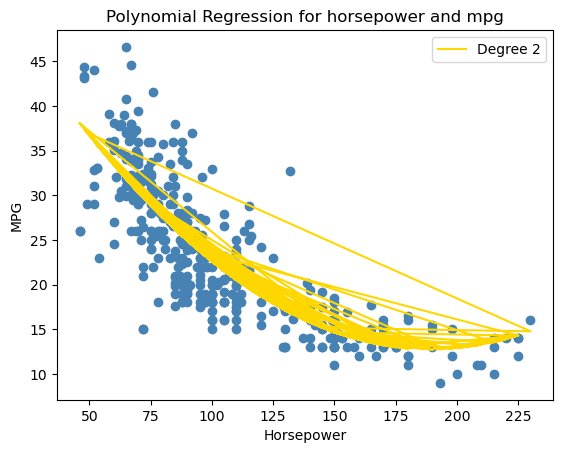

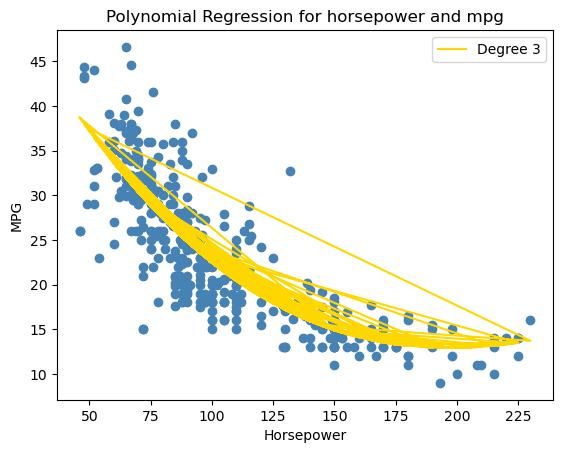

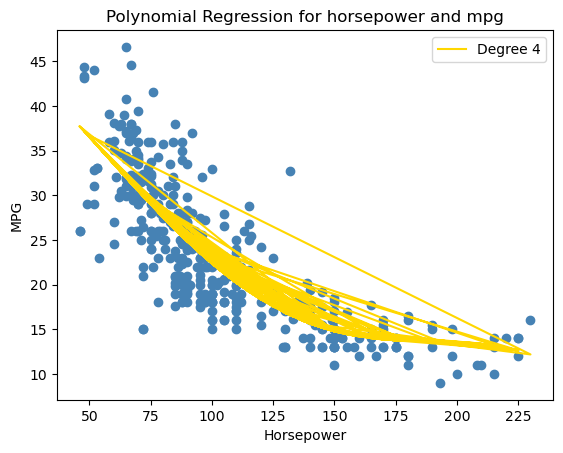

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X_hp = auto['horsepower'].values.reshape(-1,1)
y_mpg = auto['mpg'].values

for degree in [1, 2, 3, 4]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_hp, y_mpg)
    
    # Scatter plot
    plt.scatter(X_hp, y_mpg, color='steelblue')
    plt.plot(X_hp, model.predict(X_hp), label=f'Degree {degree}', color='gold')
    plt.title('Polynomial Regression for horsepower and mpg')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()
    plt.show()

Your answer:

~~~
Please write your answer in full sentences.


~~~

### Backfitting

In Section 7.7, it was mentioned that GAMs are generally fit using
a backfitting approach. The idea behind backfitting is actually quite
simple. We will now explore backfitting in the context of multiple
linear regression.
Suppose that we would like to perform multiple linear regression, but
we do not have software to do so. Instead, we only have software
to perform simple linear regression. Therefore, we take the following
iterative approach: we repeatedly hold all but one coefficient estimate
fixed at its current value, and update only that coefficient
estimate using a simple linear regression. The process is continued until
convergence—that is, until the coefficient estimates stop changing.
We now try this out on a toy example.

(a) Generate a response $Y$ and two predictors $X_1$ and $X_2$, with n = 100.
Your code:

In [ ]:
#
#

(b) Write a function `simple_reg()` that takes two arguments outcome
and feature, fits a simple linear regression model with this outcome
and feature, and returns the estimated intercept and slope.

Your code:

In [ ]:
#
#

(c) Initialize beta1 to take on a value of your choice. It does not matter what value you choose.

Your code:

In [ ]:
#
#

(d) Keeping beta1 fixed, use your function simple_reg() to fit the model:
$Y-beta_1X_1=\beta_0+\beta_2X_2+\epsilon$
Store the resulting values as beta0 and beta2.

Your code:

In [ ]:
#
#

(e) Keeping beta2 fixed, fit the model
$Y-beta_2X_2=\beta_0+\beta_1X_1+\epsilon$
Store the result as beta0 and beta1 (overwriting their previous values).

Your code:

In [ ]:
#
#

(f) Write a for loop to repeat (c) and (d) 1,000 times. Report the
estimates of beta0, beta1, and beta2 at each iteration of the for
loop. Create a plot in which each of these values is displayed,
with beta0, beta1, and beta2.


Your code:

In [ ]:
#
#

(g) Compare your answer in (e) to the results of simply performing
multiple linear regression to predict $Y$ using $X_1$ and $X_2$.
Use `axline()` method to overlay those multiple linear regression
coefficient estimates on the plot obtained in (e).




Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(h) On this data set, how many backfitting iterations were required
in order to obtain a “good” approximation to the multiple regression
coefficient estimates?


Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(h) In a toy example with `p = 100`, show that one can approximate the multiple linear regression coefficient estimates by repeatedly performing simple linear regression in a backfitting procedure. How many backfitting iterations are required in order to obtain a "good" approximation to the multiple regression coefficient estimates? Create a plot to justify your answer.


Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### Boston Data

This question uses the variables dis (the weighted mean of distances to five Boston employment centers) and nox (nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat dis as the predictor and nox as the response.
(a) Use the `poly()` function from the `ISLP.models` module to fit a cubic polynomial regression to predict nox using dis. Report the regression output, and plot the resulting data and polynomial fits.


Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.


Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.


Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Use the `bs()` function from the `ISLP.models` module to fit a regression
spline to predict nox using dis. Report the output for
the fit using four degrees of freedom. How did you choose the
knots? Plot the resulting fit.


Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(e) Now fit a regression spline for a range of degrees of freedom, and
plot the resulting fits and report the resulting RSS. Describe the
results obtained.


Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) Perform cross-validation or another approach in order to select the best degrees of freedom for a regression spline on this data.
Describe your results.


Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

## Additional Material

### Local regression

Starting with one predictor, we want to estimate a function $f$ that describes the outcome of interest $y$ such that
$$y=f(x)+\epsilon$$
where $\epsilon$ is some error.

In linear regression, we assumed the functional form to be a line
$$f(x)=\alpha+\beta x$$
where $\alpha$ is the intercept and $\beta$ is the slope. This simplification allowed us to summarize the relationship between the two variables using just one number $\beta$.  In reality, this is a gross simplification, and in particular, when prediction accuracy is more important than the description of the trend in the relationship, we may want to use more flexible methods.

For example, if your data looks like the following.  What do you do?

In [ ]:
# example based on
# http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch04.pdf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

np.random.seed(42)
# Generate data
x = np.random.uniform(0, 3, 300)
yf = np.sin(x) * np.cos(20 * x) + np.random.normal(0, 0.15, len(x))
yg = np.log(x**2 - x + 1) + np.random.normal(0, 0.15, len(x))

# Create a DataFrame
dt = pd.DataFrame({'x': x, 'yf': yf, 'yg': yg})
dt = dt.sort_values(by='x')
dt = dt.reset_index()
def afun(x):
    return np.sin(x) * np.cos(20 * x)


(
  ggplot(dt)+geom_point()+aes(x="x",y="yf")+
    stat_function(fun=afun,color="blue",alpha=0.7)
)

def bfun(x):
    return np.log((x)**2 - x + 1)


(
  ggplot(dt)+geom_point()+aes(x=x,y=yg)+
  stat_function(fun=bfun,color="blue",alpha=0.7)
)

clearly, linear relation does not hold globally.  Even in such cases, we could look at local relationships and then sew them together to get a global picture.

#### Running means or the nearest neighbor

The simplest way to estimate $f$ at $x_i$ locally is by averaging the $y$s corresponding to $x$s near $x_i$.
$$\hat{f}(x_i)=\sum_{j\in N(x_i)} y_j / n_i$$
where $N(x_i)$ indexes $n_i$ neighbors of $x_i$.

$N(x_i)$ can be defined as you wish, but the most popular choice is to use
 a symmetric neighborhood consisting of the nearest $2k + 1$ points:

$$N(x_i) = { max(i-k, 1), \dots, i-1, i, i + 1,\dots, min(i+k, n) }.$$

For example, if we were to use the 10 closest points so that

In [ ]:
# x = np.random.uniform(0, 3, 300)
# yf = np.sin(x) * np.cos(20 * x) + np.random.normal(0, 0.15, len(x))
# yg = np.log(x**2 - x + 1) + np.random.normal(0, 0.15, len(x))
#
# # Create a DataFrame
# dt = pd.DataFrame({'x': x, 'yf': yf, 'yg': yg})
# dt = dt.sort_values(by='x')

# Create colors
colors = np.repeat('black', 300)
colors[144:155]='grey'
#np.where(np.arange(1, 301) % np.arange(1, 301)[:, None] in range(145, 156), 'black', 'grey')

In [ ]:
(
  ggplot(dt)+geom_point(color=colors)+aes(x="x",y="yf")
+geom_point(aes(x=dt['x'][149],y=dt['yf'][144:155].mean()),color="red")
)

In [ ]:
(
  ggplot(dt)+geom_point(color=colors)+aes(x="x",y="yg")
+geom_point(aes(x=dt['x'][149],y=dt['yg'][144:155].mean()),color="red")
)

# # Plotting
# plt.figure(figsize=(12, 6))
#
# # Plot for yf
# plt.subplot(1, 2, 1)
# sns.scatterplot(x='x', y='yf', data=dt, hue=colors)
# sns.scatterplot(x=dt['x'][149], y=dt['yf'][144:155].mean(), color='red', label='Mean', s=100)
#
# # Plot for yg
# plt.subplot(1, 2, 2)
# sns.scatterplot(x='x', y='yg', data=dt, hue=colors)
# sns.scatterplot(x=dt['x'][149], y=dt['yg'][144:155].mean(), color='red', label='Mean', s=100)
#
# plt.tight_layout()
# plt.show()

In [ ]:
#colors=ifelse(1:300%in%(145:155),"black","grey")
# gridExtra::grid.arrange(
#   ggplot(dt)+geom_point(color=colors)+aes(x=x,y=yf)+geom_point(aes(x=dt$x[150],y=mean(dt$yf[145:155])),color="red"),
# ggplot(dt)+geom_point(color=colors)+aes(x=x,y=yg)+geom_point(aes(x=dt$x[150],y=mean(dt$yg[145:155])),color="red")
# ,ncol=2)

If we keep repeating the procedure for each point and connect the dots together, we get.

In [ ]:
dt["rolling_mean_yf"]=dt["yf"].rolling(10).mean()
dt["rolling_mean_yg"]=dt["yg"].rolling(10).mean()

(
  ggplot(dt)+geom_point(color="gray")+aes(x="x",y="yf")+geom_line(aes(x="x",y="rolling_mean_yf"),color="red")
)
(
ggplot(dt)+geom_point(color="gray")+aes(x="x",y="yg")+geom_line(aes(x="x",y="rolling_mean_yg"),color="red")+geom_point(aes(x=dt["x"].iloc[150],y=dt["yg"].iloc[145:155].mean()),color="red")
)

It looks surprisingly well on the left, but it's clearly too wigly on the right.  Usually ends are pretty bad and we can't use points at the ends that do not have observations.

If we increase the neighborhood size to 20

In [ ]:
dt["rolling_mean_yf"]=dt["yf"].rolling(20).mean()
dt["rolling_mean_yg"]=dt["yg"].rolling(20).mean()

(
  ggplot(dt)+geom_point(color="gray")+aes(x="x",y="yf")+geom_line(aes(x="x",y="rolling_mean_yf"),color="red")
)
(
ggplot(dt)+geom_point(color="gray")+aes(x="x",y="yg")+geom_line(aes(x="x",y="rolling_mean_yg"),color="red")+geom_point(aes(x=dt["x"].iloc[150],y=dt["yg"].iloc[145:155].mean()),color="red")
)

Now the left side is too smooth and the right side looks more decent.

### Running Line
Instead of using a simple mean, we can fit a regression at each neighborhood.  Then make a prediction at each $x_i$ so that
$$\hat{f} ( x_i ) = \hat{\alpha}_i + \hat{\beta}_i x_i ,$$
where $\hat{\alpha}_i$ and $\hat{\beta}_i$ are OLS estimates based on points in a neighborhood $N(x_i)$ of $x_i$. This is actually easy to do thanks to well-known regression updating formulas. Extension to weighted data is obvious. It's much better than running means.

In [ ]:
from statsmodels.regression.rolling import RollingOLS
model1 = RollingOLS(endog =dt['yf'].values , exog=dt[['x']],window=10)
rres1 = model1.fit()

model2 = RollingOLS(endog =dt['yg'].values , exog=dt[['x']],window=10)
rres2 = model2.fit()

dt['predicted_yf10'] = np.nan
dt['predicted_yg10'] = np.nan
for i in range(0, len(dt)):
    dt.loc[i,"predicted_yf10"] = np.dot(rres1.params.iloc[i], dt[['x']].iloc[i])
    dt.loc[i,"predicted_yg10"] = np.dot(rres2.params.iloc[i], dt[['x']].iloc[i])

(
  ggplot(dt)+geom_point(color="gray")+aes(x="x",y="yf")+geom_line(aes(x="x",y="predicted_yf10"),color="red")
)
(
ggplot(dt)+geom_point(color="gray")+aes(x=x,y=yg)+geom_line(aes(x="x",y="predicted_yg10"),color="red")  +geom_point(aes(x=dt["x"].iloc[150],y=dt["yg"].iloc[145:155].mean()),color="red")
)


#library(zoo)
#
# from statsmodels.regression.rolling import RollingOLS
# roll_reg = RollingOLS(dt['yf'],dt['x'], window=11)
# model = roll_reg.fit()
# fig = model.plot_recursive_coefficient(variables=['x'])
# plt.xlabel('Time step')
# plt.ylabel('Coefficient value')
# plt.show()
#
# from scipy.stats import linregress
#
# # Assuming dt is a DataFrame containing 'x', 'yf', and 'yg' columns
#
# # Define a function to extract the slope coefficient from linear regression
# def extract_slope(df):
#     slope, _, _, _, _ = linregress(df['x'], df['yf'])
#     return slope
#
# # Apply rolling window and extract the slope coefficient
# Coeff = dt.rolling(window=11, center=True).apply(extract_slope, raw=False)
#
# # Define a function to extract the slope coefficient for yg
# def extract_slope_yg(df):
#     slope, _, _, _, _ = linregress(df['x'], df['yg'])
#     return slope
#
# # Apply rolling window and extract the slope coefficient for yg
# Coefg = dt.rolling(window=11, center=True).apply(extract_slope_yg, raw=False)
#
# Coeff <- zoo::rollapply(dt,
#           width = 11, by=1,
#           FUN = function(z) {
#             predict(lm(yf~x, data=as.data.frame(z)))[6]
#           },
#           by.column = FALSE, align = "center",fill = NA )
# Coefg <- zoo::rollapply(dt,
#           width = 11, by=1,
#           FUN = function(z) {
#             predict(lm(yg~x, data=as.data.frame(z)))[6]
#           },
#           by.column = FALSE, align = "center",fill = NA )
# gridExtra::grid.arrange(
#   ggplot(dt)+geom_point(color="gray")+aes(x=x,y=yf)+geom_line(aes(x=dt$x,y=Coeff),color="red"),
# ggplot(dt)+geom_point(color="gray")+aes(x=x,y=yg)+geom_point(aes(x=dt$x[150],y=mean(dt$yg[145:155])),color="red")+geom_line(aes(x=dt$x,y=Coefg),color="red")
# ,ncol=2)

If we were to increase the neighborhood size to 20

In [ ]:
from statsmodels.regression.rolling import RollingOLS
model1 = RollingOLS(endog =dt['yf'].values , exog=dt[['x']],window=20)
rres1 = model1.fit()

model2 = RollingOLS(endog =dt['yg'].values , exog=dt[['x']],window=20)
rres2 = model2.fit()

dt['predicted_yf'] = np.nan
dt['predicted_yg'] = np.nan
for i in range(0, len(dt)):
    dt.loc[i,"predicted_yf"] = np.dot(rres1.params.iloc[i], dt[['x']].iloc[i])
    dt.loc[i,"predicted_yg"] = np.dot(rres2.params.iloc[i], dt[['x']].iloc[i])



(
  ggplot(dt)+geom_point(color="gray")+aes(x="x",y="yf")+geom_line(aes(x="x",y="predicted_yf"),color="red")
)
(
ggplot(dt)+geom_point(color="gray")+aes(x=x,y=yg)+geom_line(aes(x="x",y="predicted_yg"),color="red")  +geom_point(aes(x=dt["x"].iloc[150],y=dt["yg"].iloc[145:155].mean()),color="red")
)

### Weighted running means (Kernel Smoothers)
An alternative approach is to use a weighted running mean, with weights that decline as one moves away from the target value. To calculate $\hat{f}(x_i)$, the $j$th point receives weight
$$w_{ij}=\frac{c_i}{\lambda}d\left(\frac{|x_i-x_j|}{\lambda}\right)$$,
\begin{itemize}
\item $\lambda$ is a tunning constant called the window width or bandwidth
\item $c_i$ is a normalizing constant so the weights add up to one for each $x_i$
\item $d()$ is any kernel such as
\begin{itemize}
\item Gaussian density,
\item Epanechnikov:
\begin{eqnarray*}
d(t) =
\begin{cases}
    3/4 (1 -t^2) & \text{if $t^2 < 1$} \\
    0 & \text{other wise}
  \end{cases}
\end{eqnarray*}
\item Minimum var:
\begin{eqnarray*}
d(t) =
\begin{cases}
    3/8 (3 -5t^2) & \text{if $t^2 < 3/5$} \\
    0 & \text{other wise}
  \end{cases}
\end{eqnarray*}
\item tri-cube:
\begin{eqnarray*}
d(t) =
\begin{cases}
   70/81 (1-|t|^3)^3 & \text{if $0 \leq t \leq 1$} \\
    0 & \text{other wise}
  \end{cases}
\end{eqnarray*}
\end{itemize}
\end{itemize}

In [ ]:
# Define the Gaussian kernel
def gaussian_kernel(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# Define the Epanechnikov kernel
def epanechnikov_kernel(x, lambda_=1):
    return np.where((np.abs(x) / lambda_)**2 < 1, (1 / lambda_) * (3 / 4) * (1 - (np.abs(x) / lambda_)**2), 0)

# Define the Minimum Variance kernel
def minimum_variance_kernel(x, lambda_=1):
    return np.where((np.abs(x) / lambda_)**2 < 3/5, (1 / lambda_) * (3 / 8) * (3 - 5 * (np.abs(x) / lambda_)**2), 0)

# Define the Tri-cube kernel
def tricube_kernel(x, lambda_=1):
    return np.where((np.abs(x) / lambda_) < 1, (70 / 81) * (1 - np.abs(x)**3)**3, 0)

# Create x values for plotting
x = np.linspace(-3, 3, 1000)

# Set up subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot each kernel function
axes[0].plot(x, gaussian_kernel(x))
axes[0].set_title('Gaussian')
axes[1].plot(x, epanechnikov_kernel(x))
axes[1].set_title('Epanechnikov')
axes[2].plot(x, minimum_variance_kernel(x))
axes[2].set_title('Minimum Variance')
axes[3].plot(x, tricube_kernel(x))
axes[3].set_title('Tri-cube')

plt.show()

As you can see from the figures, some Kernels are local because there is a border where things don't matter.  Whereas Gaussian kernel is an example of a global Kernel because all the points contribute.

Using Epanechnikov kernel with lambda 0.05 and 0.2.

In [ ]:
# w=outer(dt$x,dt$x,function(x,y,lambda=0.05) {ifelse((abs(x-y)/lambda)^2<1,(1/lambda)*(3/4)*(1-(abs(x-y)/lambda)^2),0)})
# w=w/rowSums(w)
# w2=outer(dt$x,dt$x,function(x,y,lambda=0.2) {ifelse((abs(x-y)/lambda)^2<1,(1/lambda)*(3/4)*(1-(abs(x-y)/lambda)^2),0)})
# w2=w2/rowSums(w2)

# Define the Epanechnikov kernel function
def epanechnikov_kernel(x, y, lambda_=0.05):
    return np.where((np.abs(x - y) / lambda_)**2 < 1, (1 / lambda_) * (3 / 4) * (1 - (np.abs(x - y) / lambda_)**2), 0)

# Generate weight matrix w
w = np.array([[epanechnikov_kernel(x, y) for y in dt['x']] for x in dt['x']])
w = w / np.sum(w, axis=1, keepdims=True)

# Generate weight matrix w2
w2 = np.array([[epanechnikov_kernel(x, y, lambda_=0.2) for y in dt['x']] for x in dt['x']])
w2 = w2 / np.sum(w2, axis=1, keepdims=True)


dt["wyf"] =w@dt["yf"]
dt["wyg"] =w@dt["yg"]
(
  ggplot(dt)+geom_point(color="gray")+aes(x="x",y="yf")+geom_line(aes(x="x",y="wyf"),color="red")
)
(
ggplot(dt)+geom_point(color="gray")+aes(x="x",y="yg")+geom_point(aes(x=dt["x"].iloc[150],y=dt["yg"].iloc[145:155].mean()),color="red")+geom_line(aes(x="x",y="wyg"),color="red")
)

### Loess/Lowess

- Loess in nutshell is a locally weighted running line smoother.
- It is the default smoother in ggplot when you call `geom_smooth`.
- To calculate $\hat{f}(x_i)$
\begin{itemize}
\item find a symmetric nearest neighborhood of $x_i$,
\item find the distance from $x_i$ to the furthest neighbor and use this as $\lambda$,
\item use a tri-cube weight function
\begin{eqnarray*}
d(t) =
\begin{cases}
   70/81 (1-|t|^3)^3 & \text{if $0 \leq t \leq 1$} \\
    0 & \text{otherwise}
  \end{cases}
\end{eqnarray*}
\item estimate a local line using these weights, take the fitted value at $x_i$ as $\hat{f}(x_i)$.
\end{itemize}

A variant uses robust regression in each neighborhood.

In [ ]:
#pip install scikit-misc

(
  ggplot(dt)+geom_point(color="gray")+aes(x="x",y="yf")+geom_smooth(method="loess",se=False)
)
(
  ggplot(dt)+geom_point(color="gray")+aes(x="x",y="yg")+geom_smooth(method="loess",se=False)
)

By default setting loess did not work well on the left example.  To take into account the small bandwidth you need to specify the span option.

In [ ]:
(
  ggplot(dt)+geom_point(color="gray")+aes(x="x",y="yf")+geom_smooth(method="loess",span=0.3,se=False)
)
(
  ggplot(dt)+geom_point(color="gray")+aes(x="x",y="yf")+geom_smooth(method="loess",span=0.1,se=False)
)
# (
#   ggplot(dt)+geom_point(color="gray")+aes(x="x",y="yf")+geom_smooth(method="loess",span=0.05,se=False)
# )
# (
#     ggplot(dt)+geom_point(color="gray")+aes(x="x",y="yf")+geom_smooth(method="loess",span=0.03,se=False)
# )

### Other useful functions

Scatter plot smoothing with loess

In [ ]:
from ISLP import load_data
Auto = load_data('Auto')
# with(Auto, scatter.smooth(horsepower, mpg, lpars =
#                     list(col = "red", lwd = 3, lty = 3)))

sns.regplot(x="horsepower",y="mpg",data=Auto, lowess=True)
plt.show()

2D Kernel density estimate

In [ ]:
# n <- 10000
# x1  <- matrix(rnorm(n), ncol = 2)
# x2  <- matrix(rnorm(n, mean = 3, sd = 1.5), ncol = 2)
# x   <- rbind(x1, x2)
# n = 10000

# Generating data
n = 10000
x1 = np.random.normal(size=(n, 2))
x2 = np.random.normal(loc=3, scale=1.5, size=(n, 2))
x = np.concatenate((x1, x2), axis=0)
dtx = pd.DataFrame({'x1': x[:,0], 'x2': x[:,1]})
sns.kdeplot(data=dtx,x="x1",y="x2",fill=True)

### Splines

Splines are used for interpolation and smoothing.

In [ ]:
# ggplot(cars)+geom_point()+aes(x=speed,y=dist)+
#   geom_smooth(method="lm",color="blue")+
#   geom_smooth(method="loess",color="red")
# cited example from http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch04.pdf
# x = runif(300,0,3)
# yf = sin(x)*cos(20*x)+rnorm(length(x),0,0.15)
# yg = log((x)^2-x+1)+rnorm(length(x),0,0.15)
# dt<-data.frame(x,yf,yg)
# dt<- dt[order(x),]
# n <- 9
# xi <- 1:n
# yi <- rnorm(n)
# gridExtra::grid.arrange(
# ggplot(data.frame(xi,yi))+geom_point()+aes(x=xi,y=yi),
# ggplot(dt)+geom_point()+aes(x=x,y=yg)+stat_function(fun=function(x)log((x)^2-x+1),color="blue",alpha=0.7)
# ,ncol=2)


# np.random.seed(123)  # for reproducibility
# x = np.random.uniform(0, 3, 300)
# yf = np.sin(x) * np.cos(20 * x) + np.random.normal(0, 0.15, len(x))
# yg = np.log((x)**2 - x + 1) + np.random.normal(0, 0.15, len(x))
#
# # Creating a DataFrame
# dt = pd.DataFrame({'x': x, 'yf': yf, 'yg': yg})
# dt = dt.sort_values(by='x')  # Sorting by x

# Creating data for grid.arrange
n = 9
xi = np.arange(1, n+1)
yi = np.random.normal(size=n)

dti = pd.DataFrame({'xi': xi, 'yi': yi})
(
  ggplot(dti)+geom_point()+aes(x="xi",y="yi"),
)

(
  ggplot(dt)+geom_point()+aes(x="x",y="yg")+stat_function(fun=lambda x: np.log((x)**2-x+1),color="blue",alpha=0.7)
)

On the left, we see 9 points observed across the span of $x$, and the goal is to fit a line through these points, not necessarily find a linear trend.  On the left is a case where we see a bend in the data and the idea is to find a reasonable line representing this data cloud.

The initial starting point is to fit a straight line and glue them together. We can do so by fitting regression to subset of the data.

In [ ]:
dt['co'] = pd.factorize(1 * (dt['x'] > 0.5) + 1)[0] + 1
(
ggplot(dti)+geom_point()+geom_line()+aes(x="xi",y="yi")
)
(
ggplot(dt)+geom_point(alpha=0.2)+aes(x="x",y="yg",color="factor(co)")+geom_smooth(method="lm",se=False)
)

The problem, as apparent from the figure above, is that the result is not necessarily smooth or continuous where the lines meet, which is called the knots.  Spline is a popular method to achieve continuity at the knots.

### Splines

A spline is a piece-wise polynomial with pieces defined by a sequence of knots
$$\eta_1 <\eta_2<\cdots<\eta_k$$
such that the pieces join smoothly at the knots.

The simplest case is a linear spline with one knot $\eta_1$
$$S(x)=\beta_0+\beta_1 x +\gamma ( x-\eta_1)_{+}$$
term $( x - \eta_1)_{+}$ is 0 until $x$ is larger than $\eta_1$.
<!-- Which means up to $\eta_1$, $S(x)=\beta_0+\beta_1 x$ and after $\eta_1$    -->
<!-- $S(x)=a(\beta_0 - \gamma\eta_1)+(\beta_1+\gamma) x$.   -->

In [ ]:
## Fit model

# lm1 <- lm(formula = yg ~ bs(x, df = NULL, knots = c(0.5), degree = 1),
#           data    = dt)
# ## Create a data frame to hold prediction
# newdat <- data.frame(x = seq(from = min(dt$x),
#                                  to = max(dt$x), by = 0.01))
# ## Predict
# newdat$yg <- predict(lm1, newdata = newdat)

import statsmodels.api as sm

#Fit the linear regression model
lm1 = sm.formula.ols(formula='yg ~ bs(x, knots=[0.5], degree=1)', data=dt).fit()

# Create a data frame for prediction
newdat = pd.DataFrame({'x': np.arange(dt['x'].min(), dt['x'].max(), 0.01)})

# Predict
newdat['yg'] = lm1.predict(newdat)

## Plot the previous plot with a regression line
(
  ggplot(data = dt,
                mapping = aes(x = "x", y = "yg")) +geom_point(alpha=0.3)+ geom_line(data = newdat, color = "red")+stat_function(fun=lambda x: np.log((x)**2-x+1),color="blue",alpha=0.7,linetype="dashed")

)

For a spline of degree $m$ one usually requires the polynomials and their
first $m - 1$ derivatives to agree at the knots, so that $m - 1$ derivatives are continuous.
A spline of degree $m$ can be represented as a power series:

$$S(x)=\sum^m_{j=0}\beta_0 x^j+\sum^k_{j=1}\gamma_j(x-\eta_j)^{m}_{+}$$

The most popular splines are cubic splines:
$$S(x)= \beta_0 +\beta_1x+\beta_2x^2+\beta_3x^3+\sum^k_{j=1}\gamma_j(x-\eta_j)^3_{+}$$

In [ ]:
# Fit the linear regression model
lm1 = sm.formula.ols(formula='yg ~ bs(x, knots=[0.5], degree=3)', data=dt).fit()

# Create a data frame for prediction
newdat = pd.DataFrame({'x': np.arange(dt['x'].min(), dt['x'].max(), 0.01)})

# Predict
newdat['yg'] = lm1.predict(newdat)
## Plot the previous plot with a regression line
(
ggplot(data = dt,
                mapping = aes(x = "x", y = "yg")) +geom_point(alpha=0.3) + geom_line(data = newdat, color = "red")+ stat_function(fun=lambda x: np.log((x)**2-x+1),color="blue",alpha=0.7,linetype="dashed")     +geom_vline(xintercept=0.5,linetype="dotted")


)

#### Interpolating Splines
Suppose we know the values of a function at $k$ points $x_1 < \dots < x_k$ and would like to interpolate for other $x$’s.
If we used a spline of degree $m$ with knots at the observed $x$’s, we would have $m + 1 + k$ parameters to estimate with only $k$ observations. Obviously, we need some restrictions.

In [ ]:
women=pd.read_csv("women.csv")
(
ggplot(women)+aes(x="height",y="weight")+geom_point()
)
(
ggplot(dti)+aes(x="xi",y="yi")+geom_point()
)

#### Natural Splines
A spline of odd degree $m = 2\nu-1$ is called a natural spline if it is a polynomial of degree $\nu - 1$ outside the range of the knots (i.e. below $\eta_1$ or above $\eta_k$).
A natural cubic spline ($\nu=2$) is linear outside the range of the data.
For a natural spline,
\begin{eqnarray*}
\beta_j &=& 0 \mbox{ for } j=\nu,\dots,2\nu-1 \\
\sum^k_{i=1}\gamma_i\eta_i^j &=&0 \mbox{ for } j=0,1,\dots,\nu-1.
\end{eqnarray*}

This imposes exactly $m + 1$ restrictions, so we have $k$ parameters left. Note that a natural cubic spline has the form

$$S(x)=\beta_0 +\beta_1 x+ \sum^k_{j=1}\gamma_j(x-\eta_j)^3_{+}$$,
subject to the restrictions
$\sum \gamma_j =0$ and $\sum \gamma_j\eta_j =0$
so we end up with $k$ parameters.

In [ ]:
# library(splines)
# require(graphics); require(stats)
# ispl  <- interpSpline( women$height, women$weight ,bSpline=TRUE)
# ispl2 <- interpSpline( weight ~ height,  women ,bSpline=TRUE)
# # ispl and ispl2 should be the same
# par(mfrow = c(1,2), mgp = c(2,.8,0), mar = 0.1+c(3,3,3,1))
#
# #par(mfrow=c(1,2))
# plot( predict( ispl, seq( 55, 75, length.out = 51 ) ), type = "l" )
# points( women$height, women$weight )
# #plot( ispl )    # plots over the range of the knots
# #points( women$height, women$weight )
# #splineKnots( ispl )
#
# ispl2 <- interpSpline( yi ~ xi ,bSpline=TRUE)
# plot(predict( ispl2, seq( -1, 10, length.out = 51 ) ), type = "l")
# points(xi,yi)

from scipy.interpolate import interp1d
# Define the interpolation function using cubic splines
ispl = interp1d(women['height'], women['weight'], kind='cubic')

# Plot the interpolated values
x_values = np.linspace(58, 72, 51)
plt.figure(figsize=(10, 5))
plt.plot(x_values, ispl(x_values), 'r-', label='Interpolated spline')
plt.scatter(women['height'], women['weight'], color='blue', label='Original data')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Interpolation using Cubic Splines')
plt.legend()
plt.grid(True)
plt.show()

# Define the interpolation function using cubic splines
ispl2 = interp1d(xi, yi, kind='cubic')

# Plot the interpolated values
x_values = np.linspace(1, 9, 51)
plt.figure(figsize=(10, 5))
plt.plot(x_values, ispl2(x_values), 'r-', label='Interpolated spline')
plt.scatter(xi, yi, color='blue', label='Original data')
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Interpolation using Cubic Splines')
plt.legend()
plt.grid(True)
plt.show()

#### Spline Regression

Consider now the problem of smoothing a scatterplot.

In [ ]:
#Auto = load_data('Auto')
(
ggplot(dt)+aes(x="x",y="yg")+geom_point()
)
(
ggplot(Auto)+aes(x="mpg",y="acceleration")+geom_point()
)

One approach is to select s suitable set of knots with $k << n$ and then fit a spline by OLS (or WLS, or maximum likelihood).

For a cubic spline, this amounts to regressing $y$ on $k + 4$ predictors, namely
$1,x,x_2,x_3,(x-\eta_1)^3_{+},(x-\eta_2)^3_{+},...,(x-\eta_k)^3_{+}$
For a natural cubic spline, we would drop $x^2$ and $x^3$ and impose the additional constraints
  $$\sum\gamma =  \sum \gamma\eta = 0.$$
Actually, these constraints can be eliminated by suitable re-parametrization. For example, a natural cubic spline with two interior knots plus one knot at each extreme of the data can be fit by regressing $y$ on three covariates, $x$, $z_1$, and $z_2$, where
 and
$$z_1 = ( x - \eta_1 )^3_{+} -\frac{ ( \eta_1 - \eta_4 )} {(\eta_3 - \eta_4)} ( x - \eta_3 )^3_{+}$$
$$z_2 = ( x - \eta_2 )^3_{+} -\frac{( \eta_2 - \eta_4 )} {(\eta_3 - \eta_4)}( x - \eta_3 )^3_{+} .$$

#### B-Splines

A much better representation of splines for computation is as linear combinations of a set of basis splines called B-splines. These are numerically more stable, among other reasons, because each B-spline is non-zero over a limited range of knots. They are not so easy to calculate, but fortunately, R and S have functions for calculating a basis, see bs for B-splines and ns for natural B-splines.
Regression splines are very popular because they are easy to use, and can be incorporated without difficulty as part of other estimation procedures.
The main problem is where to place the knots. Often, they are placed at selected percentiles. A smarter strategy would place more knots in regions where $f(x)$ is changing more rapidly. Knot placement is an arcane art form and the first disadvantage cited by detractors of regression splines.

In [ ]:
(
  ggplot(dt)+aes(x="x",y="yg")+geom_point()
)
(
  ggplot(Auto)+aes(x="mpg",y="acceleration")+geom_point()
)
#
# Generate a sequence of xxmpg values
xxmpg = np.arange(9, 46.7, 0.1)

# Fit the linear regression model with a cubic spline term
model = sm.formula.ols(formula='acceleration ~ bs(mpg, df=5)', data=Auto).fit()

# Create a DataFrame for prediction
newdata = pd.DataFrame({'mpg': xxmpg})

# Make predictions
predac = model.predict(newdata)

# Plot the original data points
plt.scatter(Auto['mpg'], Auto['acceleration'], color='blue', label='Original Data')

# Plot the predicted values
plt.plot(xxmpg, predac, color='red', label='Predicted Values')

# Add labels and legend
plt.xlabel('mpg')
plt.ylabel('acceleration')
plt.title('Acceleration vs. MPG with Cubic Spline')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

#### Smoothing Splines

A more formal approach to the problem is to consider fitting a spline with knots at every data point. It could fit perfectly but estimate its parameters by minimizing the usual sum of squares plus a roughness penalty.
A suitable penalty is to integrate the squared second derivative, leading to the following criterion, known as the penalized sum of squares:

$$PSS =  (y_i-S(x_i))^2 + \lambda(S''(x))^2dx$$

where integration is over the range of x, and $\lambda$ is a tuning parameter. As $\lambda\rightarrow 0$ we impose no penalty and end up with a very close fit, but the resulting curve could be very noisy as it follows every detail in the data. As $\lambda\rightarrow \infty$ the penalty dominates, the solution converges to the OLS line, which is as smooth as you can get (the second derivative is always 0) but may be a very poor fit.
Amazingly, it can be shown that minimizing the PSS for a fixed $\lambda$ over the space of all continuous differentiable functions leads to a unique solution, and this solution is a natural cubic spline with knots at the data points.
More generally, penalizing the squared v-th derivative leads to a natural spline of degree $2\nu-1$. For proof, see Reinsch (1967).

In [ ]:
# smooth.spline2 <- function(formula, data, ...) {
#   mat <- model.frame(formula, data)
#   smooth.spline(mat[, 2], mat[, 1])
# }
#
# predictdf.smooth.spline <- function(model, xseq, se, level) {
#   pred <- predict(model, xseq)
#   data.frame(x = xseq, y = pred$y)
# }
#
# qplot(mpg, wt, data = mtcars) + geom_smooth(method = "smooth.spline2", se= F)
# qplot(x, yg, data = dt) + geom_smooth(method = "smooth.spline2", se= F)

from scipy.interpolate import UnivariateSpline

def smooth_spline(x, y):
    spline = UnivariateSpline(x, y)
    return spline(x)

def predict_df_smooth_spline(model, xseq):
    y_pred = model(xseq)
    return pd.DataFrame({'x': xseq, 'y': y_pred})

# Example usage
mtcars = pd.read_csv('mtcars.csv')  # Assuming mtcars.csv contains the data
#mtcars = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')
# Edit element of column header
mtcars.rename(columns={'Unnamed: 0':'brand'}, inplace=True)
mtcars=mtcars.sort_values(by=['mpg'])
#dt = pd.read_csv('dt.csv')  # Assuming dt.csv contains the data

# Plotting with smooth.spline2 method
fig, axes = plt.subplots(2)

# First plot
axes[0].scatter(mtcars['mpg'], mtcars['wt'])
axes[0].plot(mtcars['mpg'], smooth_spline(mtcars['mpg'], mtcars['wt']), color='red')
axes[0].set_xlabel('mpg')
axes[0].set_ylabel('wt')

# Second plot
axes[1].scatter(dt['x'], dt['yg'])
axes[1].plot(dt['x'], smooth_spline(dt['x'], dt['yg']), color='red')
axes[1].set_xlabel('x')
axes[1].set_ylabel('yg')

plt.show()

#### Cross-Validation
We have solved the problem of knot placement, but now we have to pick an appropriate value for $\lambda$. Some claim this is easier because we are left with a single number to worry about.
Wabba and others have suggested a technique known as cross-validation. Let $S_{\lambda}(-i)$ denote the spline fit with tuning parameter $\lambda$ while omitting the i-th observation. We can compare this fit with the observed value $y_i$, and
we can summarize these differences by computing a sum of squares
$$CVSS(\lambda) = \sum_{i=1}^{n} (y_i-\hat{S}_{\lambda} (x_i))^2 $$
 which depends on $\lambda$. The idea is to pick $\lambda$ to minimize the $CVSS(\lambda)$.
This sounds like a lot of work but it isn’t, thanks again to regression updating formulas, which can be used to show that
$$CVSS(\lambda) = \sum_{i=1}^{n} \frac{(y_i - \hat{S}_{\lambda} (x_i))^2}{ 1 - A_{ii}}$$

where $A_{ii}$ is a diagonal element of $A = (I - \lambda K)-1$. This extends easily to WLS.
An alternative criterion is to replace the Aii with their average, which is $tr(A)/n$. This leads to a generalized CVSS that has been found to work well in practice.

### basis function plotting

Basis functions are mysterious, but it's pretty neat once you get what bs and ns are doing.

#### linear

In [ ]:
# from ISLP import load_data
Wage = load_data('Wage')
# fit1 = smf.ols('wage~bs(age, knots = (25,40,60), degree = 1, include_intercept = False)',
#                            data = Wage).fit()
#
# #fit1=lm(wage~bs(age,degree=1,knots=c(25,40,60)),data=Wage)
# fit1.params
#
# bs.weight1<-fit1$coefficients[-1]/sum(fit1$coefficients[-1])
# bs.age1<-with(Wage,bs(age,degree=1,knots=c(25,40,60)))
# xage=seq(18,80,by=1)
# pred.bs.age1<- predict(bs.age1,newx=xage)



import statsmodels.api as sm
from patsy import dmatrix

# Assuming Wage is a DataFrame containing the data

# Fit linear regression with basis splines
knots = [25, 40, 60]
bs_age = dmatrix("bs(age, knots=knots, degree=1, include_intercept=False)", {"age": Wage["age"]})
X = sm.add_constant(bs_age)
y = Wage["wage"]
fit1 = sm.OLS(y, X).fit()

# Print coefficients
print(fit1.params)

# Calculate weights for basis splines
bs_weight1 = fit1.params[1:] / sum(fit1.params[1:])

# Generate sequence of ages
xage = np.arange(18, 81, 1)

# Predict using basis splines
pred_bs_age1 = dmatrix("bs(xage, knots=knots, degree=1, include_intercept=False)", {"xage": xage})

In [ ]:
# par(mfrow=c(1,3))
# plot(range(xage),c(0,1),type="n")
# for(i in 1:4) lines(xage,pred.bs.age1[,i])
# plot(range(xage),c(0,1),type="n")
# for(i in 1:4) lines(xage,bs.weight1[i]*pred.bs.age1[,i])
# plot(Wage$age,Wage$wage,col="gray")
# lines(xage,fit1$coefficients[1]+pred.bs.age1%*%fit1$coefficients[-1],type="l")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot basis splines
axes[0].set_xlim(min(xage), max(xage))
axes[0].set_ylim(0, 1)
for i in range(pred_bs_age1.shape[1]):
    axes[0].plot(xage, pred_bs_age1[:, i])

# Plot weighted basis splines
axes[1].set_xlim(min(xage), max(xage))
axes[1].set_ylim(0, 1)
for i in range(bs_weight1.shape[0]):
    axes[1].plot(xage, bs_weight1[i] * pred_bs_age1[:, i])

# Plot age vs wage with the linear regression fit
axes[2].scatter(Wage['age'], Wage['wage'], color="gray")
axes[2].plot(xage, fit1.params[0] + np.dot(pred_bs_age1[:,1:5], fit1.params[1:]), color='blue')

plt.show()

#### quadratic

In [ ]:
# fit2=lm(wage~bs(age,degree=2,knots=c(25,40,60)),data=Wage)
# bs.weight2<-fit2$coefficients[-1]/sum(fit2$coefficients[-1])
# bs.age2<-with(Wage,bs(age,degree=2,knots=c(25,40,60)))
# xage=seq(18,80,by=1)
# pred.bs.age2<- predict(bs.age2,newx=xage)

# par(mfrow=c(1,3))
# plot(range(xage),c(0,1),type="n")
# for(i in 1:5) lines(xage,pred.bs.age2[,i])
# plot(range(xage),c(0,1),type="n")
# for(i in 1:5) lines(xage,bs.weight2[i]*pred.bs.age2[,i])
# plot(Wage$age,Wage$wage,col="gray")
# lines(xage,fit2$coefficients[1]+pred.bs.age2%*%fit2$coefficients[-1],type="l")



# Fit linear regression with quadratic splines
bs_age2 = dmatrix("bs(age, knots=knots, degree=2, include_intercept=False)", {"age": Wage["age"]})
X2 = sm.add_constant(bs_age2)
fit2 = sm.OLS(y, X2).fit()

# Calculate weights for quadratic splines
bs_weight2 = fit2.params[1:] / sum(fit2.params[1:])

# Generate sequence of ages
xage = np.arange(18, 81, 1)

# Predict using quadratic splines
pred_bs_age2 = dmatrix("bs(xage, knots=knots, degree=2, include_intercept=False)", {"xage": xage})

# Set up multi-panel plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot basis splines
axes[0].set_xlim(min(xage), max(xage))
axes[0].set_ylim(0, 1)
for i in range(1,pred_bs_age2.shape[1]):
    axes[0].plot(xage, pred_bs_age2[:, i])


# Plot weighted basis splines
axes[1].set_xlim(min(xage), max(xage))
axes[1].set_ylim(0, 1)
for i in range(1,pred_bs_age2.shape[1]):
    axes[1].plot(xage, bs_weight2[i-1] * pred_bs_age2[:, i])


# Plot age vs wage with the linear regression fit
axes[2].scatter(Wage['age'], Wage['wage'], color="gray")
axes[2].plot(xage, fit2.params[0] + np.dot(pred_bs_age2[:,1:6], fit2.params[1:]), color='blue')

plt.show()

#### cubic

In [ ]:
# fit3=lm(wage~bs(age,knots=c(25,40,60)),data=Wage)
# bs.age<-with(Wage,bs(age,knots=c(25,40,60)))
# xage=seq(18,80,by=1)
# pred.bs.age<- predict(bs.age,newx=xage)
# par(mfrow=c(1,3))
# plot(range(xage),c(0,1),type="n")
# for(i in 1:6) lines(xage,pred.bs.age[,i])
# plot(range(xage),c(0,1),type="n")
# for(i in 1:6) lines(xage,bs.weight1[i]*pred.bs.age[,i])
# plot(Wage$age,Wage$wage,col="gray")
# lines(xage,fit3$coefficients[1]+pred.bs.age%*%fit3$coefficients[-1],type="l")

# Fit linear regression with linear splines
bs_age = dmatrix("bs(age, knots=knots, include_intercept=False)", {"age": Wage["age"]})
X3 = sm.add_constant(bs_age)
fit3 = sm.OLS(y, X3).fit()
bs_weight3 = fit3.params[1:] / sum(fit3.params[1:])

# Generate sequence of ages
xage = np.arange(18, 81, 1)

# Predict using linear splines
pred_bs_age = dmatrix("bs(xage, knots=knots, include_intercept=False)", {"xage": xage})

# Set up multi-panel plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot basis splines
axes[0].set_xlim(min(xage), max(xage))
axes[0].set_ylim(0, 1)
for i in range(1,pred_bs_age.shape[1]):
    axes[0].plot(xage, pred_bs_age[:, i])

# Plot weighted basis splines
axes[1].set_xlim(min(xage), max(xage))
axes[1].set_ylim(0, 1)
for i in range(1,pred_bs_age.shape[1]):
    axes[1].plot(xage, bs_weight3[i-1] * pred_bs_age[:, i])

# Plot age vs wage with the linear regression fit
axes[2].scatter(Wage['age'], Wage['wage'], color="gray")
axes[2].plot(xage, fit3.params[0] + np.dot(pred_bs_age[:,1:7], fit3.params[1:]), color='blue')

plt.show()

### Manually drawing the interval

If you want to draw confidence and prediction intervals, using the R predict function is the easiest thing to do.

In [ ]:
from ISLP.models import ModelSpec as MS, ns
import statsmodels.api as sm
from patsy import dmatrix
# Data Generation
np.random.seed(12345)
x = np.arange(1, 101)
y = np.sin(np.pi * x / 50) + np.random.normal(0, 0.4, 100)
dtaa = pd.DataFrame({'x': x, 'y': y})
epsilon = np.random.normal(0, 3, 100)
knots = [10, 20, 30, 40, 50, 60, 70, 80, 90]

ns_x = MS([ns('x', df=5)]).fit(dtaa)
myFit = sm.OLS(y, ns_x.transform(dtaa)).fit()

# Plotting the Result
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Data')
plt.plot(x, myFit.fittedvalues, label='Fitted', color='red')
plt.plot(x, myFit.get_prediction().conf_int()[:, 0], linestyle='--', color='blue', label='Confidence Interval')
plt.plot(x, myFit.get_prediction().conf_int()[:, 1], linestyle='--', color='blue')
plt.plot(x, myFit.get_prediction().predicted_mean, linestyle='--', color='green', label='Prediction Interval')
plt.legend()
plt.show()

In [ ]:
# Point-wise Standard Error Calculation
X = sm.add_constant(x)
sigma = myFit.mse_resid ** 0.5
var_Yhat = np.diag(np.dot(X, np.dot(np.linalg.inv(np.dot(X.T, X)), X.T))) * sigma ** 2
print(np.mean(myFit.get_prediction().se_mean - np.sqrt(var_Yhat)))

# Another Option for Standard Error Calculation
# X_new = np.column_stack([np.ones(101), ns(np.arange(50, 151), knots=knots, intercept=False)])
# var_Yhat = (np.diag(np.dot(X_new, np.dot(np.linalg.inv(np.dot(X.T, X)), X_new.T))) + 1) * sigma ** 2
# print(np.mean(myFit.get_prediction(exog=X_new).se_mean - np.sqrt(var_Yhat)))

### using mgcv gam

There are two popular packages for fitting GAM in R.

- `gam`
- `mgcv`

The authors of the book like `gam`.  But `mgcv` is better at doing some things because they are Bayesian. The key difference is that `gam` uses smoothing spline whereas `mgcv` uses p-spline.  Also, the uncertainty interval is Bayesian for `mgcv`, which tends to be better calibrated.

#### kyphosis example (gam)

84 Children at the Toronto Hospital for Sick Children underwent Laminectomy, a corrective spinal surgery for a variety of abnormalities under the general heading kyphosis.
Results: 65 successes, 19 kyphosis still present.
Goal: Try to understand/predict whether the operation will be successful

In [ ]:
kyphosis=pd.read_csv("kyphosis.csv")

In [ ]:
kyphosis['Kyphosis01'] = kyphosis['Kyphosis'].apply(lambda x: 1 if x == "present" else 0)


from pygam import LogisticGAM, s
# Fit the Generalized Additive Model (GAM)
kyphosis_gam = LogisticGAM(s(0) + s(1, n_splines=5) + s(2, n_splines=5),
                            fit_intercept=True).fit(kyphosis[['Age', 'Number', 'Start']], kyphosis['Kyphosis01'])

# Display the summary of the GAM
print(kyphosis_gam.summary())


fig, axs = plt.subplots(1, 3)
titles = ['Age', 'Number', 'Start']

for i, ax in enumerate(axs):
    XX = kyphosis_gam.generate_X_grid(term=i)
    pdep, confi = kyphosis_gam.partial_dependence(term=i, width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);


plt.show()

### Other Examples

#### Air pollution example (HSAUR2)
Air pollution data of 41 US cities. The annual mean concentration of sulfur dioxide, in micrograms per cubic meter, is a measure of the city's air pollution. The question of interest here is what aspects of climate and human ecology, as measured by the other six variables in the data, determine pollution?

In [ ]:
from pygam import LinearGAM

USairpollution=pd.read_csv("USairpollution.csv")
USairpollution.rename(columns={"Unnamed: 0": "State"})
# Fit the Generalized Additive Model (GAM)
USairpollution_gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5)).fit(USairpollution.loc[:,["temp",  "manu" , "popul"  ,"wind"  ,"precip" , "predays"]], USairpollution['SO2'])

# Predict SO2
SO2hat = USairpollution_gam.predict(USairpollution.loc[:,["temp",  "manu" , "popul"  ,"wind"  ,"precip" , "predays"]])

# Calculate residuals
residuals = USairpollution['SO2'] - SO2hat

# Create the residual plot
plt.figure(figsize=(8, 6))
plt.plot(SO2hat, residuals, 'bo', markersize=5)
plt.axhline(y=0, color='grey', linestyle='--')
plt.xlabel('Fitted values (SO2hat)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

fig, axs = plt.subplots(1, 6)
titles = ["temp",  "manu" , "popul"  ,"wind"  ,"precip" , "predays"]
xxp=USairpollution.loc[:,["temp",  "manu" , "popul"  ,"wind"  ,"precip" , "predays"]]
for i, ax in enumerate(axs):
    XX = USairpollution_gam.generate_X_grid(term=i)
    pdep= USairpollution_gam.predict(XX)
    confi = USairpollution_gam.prediction_intervals(XX, width=.95)
    ax.scatter(xxp[titles[i]], USairpollution['SO2'], c='k', alpha=0.2)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);


plt.show()